In [1]:
# general libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# clustering
from sklearn.decomposition import PCA  # dimensional reduction
import umap  # dimensional reduction, clustering, & visualization
from sklearn.manifold import TSNE  # clustering, & visualization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  # dimensional reduction, clustering, & visualization
import hdbscan  # labels
import sklearn.cluster as cluster  # KMeans - clustering & visualization
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [2]:
## data and preprocessing

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.fillna(0)
print(penguins.head())

parameters = list(penguins.columns)
print(parameters)
parameters.remove(parameters[0])  # removes species, which is the labels


def convert_to_binary(data):
    # changes string data to numeric data
    
    string = list(set(data))
    num_string = len(data.value_counts())
    
    sub = {}
    for x in range(num_string):
        key = string[x]
        value = x
        sub[key] = value
        
    data = [sub[x] for x in data]
    
    return sub, data


_, penguins['island'] = convert_to_binary(penguins['island'])
_, penguins['sex'] = convert_to_binary(penguins['sex'])  # has a '.' value


penguins_data = penguins[parameters].astype(float)

# penguins_data_nosex = penguins_data.drop(columns=['sex'])
# penguins_data_noisland = penguins_data.drop(columns=['island'])
penguins_data_neither = penguins_data.drop(columns=['sex', 'island'])
# penguins_data_noflipper = penguins_data.drop(columns=['flipper_length_mm'])
penguins_data_neither

  species_short     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie  Torgersen              39.1             18.7   
1        Adelie  Torgersen              39.5             17.4   
2        Adelie  Torgersen              40.3             18.0   
3        Adelie  Torgersen               0.0              0.0   
4        Adelie  Torgersen              36.7             19.3   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    MALE  
1              186.0       3800.0  FEMALE  
2              195.0       3250.0  FEMALE  
3                0.0          0.0       0  
4              193.0       3450.0  FEMALE  
['species_short', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,0.0,0.0,0.0,0.0
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,0.0,0.0,0.0,0.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [3]:
## scaling and transforming data

dict_c, penguins_labels = convert_to_binary(penguins.species_short)

c = [sns.color_palette()[x] for x in penguins.species_short.map(dict_c)]


penguins_data = np.array(penguins_data)
# penguins_data_nosex = np.array(penguins_data_nosex)
# penguins_data_noisland = np.array(penguins_data_noisland)
penguins_data_neither = np.array(penguins_data_neither)
# penguins_data_noflipper = np.array(penguins_data_noflipper)


scaled_penguins_data = StandardScaler().fit_transform(penguins_data)
# scaled_penguins_data_nosex = StandardScaler().fit_transform(penguins_data_nosex)
# scaled_penguins_data_noisland = StandardScaler().fit_transform(penguins_data_noisland)
scaled_penguins_data_neither = StandardScaler().fit_transform(penguins_data_neither)
# scaled_penguins_data_noflipper = StandardScaler().fit_transform(penguins_data_noflipper)


# before = pd.DataFrame(penguins_data)
# before.columns = penguins.columns[1:7]
# print(before.head())
# after = pd.DataFrame(scaled_penguins_data)
# after.columns = penguins.columns[1:7]
# print(after.head())

In [4]:
c = [sns.color_palette()[x] for x in penguins.species_short.map(dict_c)]

Text(0.5, 1.0, 'LDA')

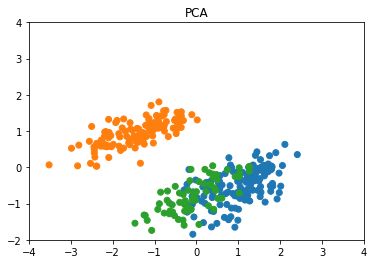

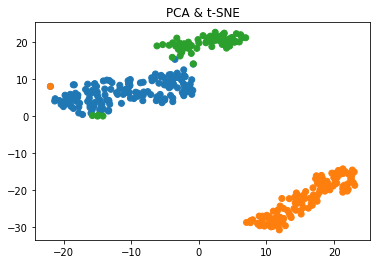

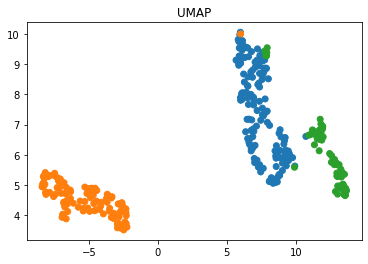

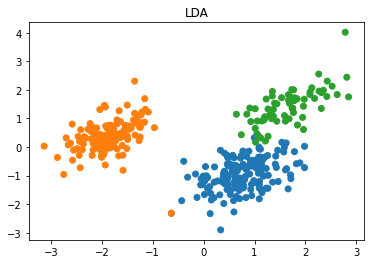

In [5]:
# PCA 
pca_features = PCA().fit_transform(scaled_penguins_data_neither)
plt.figure()
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=c)
plt.title('PCA')
plt.xlim(-4, 4)
plt.ylim(-2, 4)


# PCA & t-SNE
pca_features = PCA().fit_transform(scaled_penguins_data_neither)
tsne = TSNE(n_components=2).fit_transform(pca_features)
plt.figure()
plt.scatter(tsne[:, 0], tsne[:, 1], c=c)
plt.title('PCA & t-SNE')


# UMAP
embedding = umap.UMAP(n_components=2).fit_transform(scaled_penguins_data_neither)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=c)
plt.title('UMAP')


# LDA
hd = hdbscan.hdbscan_.HDBSCAN().fit(scaled_penguins_data_neither)
hd_labels = [hd.labels_[x] for x in range(hd.labels_.shape[0]) if x >= 0]  # removes noise (noise is labeled as -1)
true_labels = penguins_data[:, 0]
X_LDA = LDA(n_components=2).fit_transform(scaled_penguins_data_neither, true_labels)  # (data, y)
plt.figure()
plt.scatter(X_LDA[:, 0], X_LDA[:, 1], c=c)
plt.title('LDA')

In [9]:
penguins.species_short

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species_short, Length: 344, dtype: object

In [6]:
# ## clustering using KMeans and scaled data

# plt.figure()
# kmeans = cluster.KMeans(n_clusters=3).fit_transform(scaled_penguins_data)
# plt.scatter(
#     kmeans[:, 0],
#     kmeans[:, 1],
#     c=c)
# plt.title('K-means Penguin all parameters', fontsize=20)
# plt.xlim(0, 6)
# plt.ylim(0, 6)


# plt.figure()
# kmeans = cluster.KMeans(n_clusters=3).fit_transform(scaled_penguins_data_neither)
# fitted = cluster.KMeans(n_clusters=3).fit(scaled_penguins_data_neither)
# fitted_labels = [fitted.labels_[x] for x in range(fitted.labels_.shape[0]) if x >= 0]
# true_labels = [penguins_data[x, 0] for x in range(fitted.labels_.shape[0]) if x >= 0]
# plt.scatter(
#     kmeans[:, 0],
#     kmeans[:, 1],
#     c=c)
# plt.title('K-means Penguin no sex/island', fontsize=20)
# plt.xlim(0, 6)
# plt.ylim(0, 6)
# print(adjusted_rand_score(true_labels, fitted_labels))
# print(adjusted_mutual_info_score(true_labels, fitted_labels))


# plt.figure()
# kmeans = cluster.KMeans(n_clusters=3).fit_transform(scaled_penguins_data_nosex)
# plt.scatter(
#     kmeans[:, 0],
#     kmeans[:, 1],
#     c=c)
# plt.title('K-means Penguin no sex', fontsize=20)
# plt.xlim(0, 6)
# plt.ylim(0, 6)


# plt.figure()
# kmeans = cluster.KMeans(n_clusters=3).fit_transform(scaled_penguins_data_noisland)
# plt.scatter(
#     kmeans[:, 0],
#     kmeans[:, 1],
#     c=c)
# plt.title('K-means Penguin no island', fontsize=20)
# plt.xlim(0, 6)
# plt.ylim(0, 6)


# plt.figure()
# kmeans = cluster.KMeans(n_clusters=3).fit_transform(scaled_penguins_data_noflipper)
# plt.scatter(
#     kmeans[:, 0],
#     kmeans[:, 1],
#     c=c)
# plt.title('K-means Penguin no flipper', fontsize=20)
# plt.xlim(0, 6)
# plt.ylim(0, 6)

In [7]:
# ## clustering using UMAP and scaled data

# plt.figure()
# embedding = umap.UMAP().fit_transform(scaled_penguins_data)
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=c)
# plt.title('UMAP Penguin all parameters', fontsize=20)


# plt.figure()
# embedding = umap.UMAP().fit_transform(scaled_penguins_data_neither)
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=c)
# plt.title('UMAP Penguin no sex/island', fontsize=20)


# plt.figure()
# embedding = umap.UMAP().fit_transform(scaled_penguins_data_nosex)
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=c)
# plt.title('UMAP Penguin no sex', fontsize=20)


# plt.figure()
# embedding = umap.UMAP().fit_transform(scaled_penguins_data_noisland)
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=c)
# plt.title('UMAP Penguin no island', fontsize=20)


# plt.figure()
# embedding = umap.UMAP().fit_transform(scaled_penguins_data_noflipper)
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=c)
# plt.title('UMAP Penguin no flipper', fontsize=20)

In [8]:
# plt.figure()
# embedding1 = cluster.KMeans(n_clusters=3).fit_transform(scaled_penguins_data_neither)
# hd = hdbscan.hdbscan_.HDBSCAN().fit(embedding1)
# hd_labels = [hd.labels_[x] for x in range(hd.labels_.shape[0]) if x >= 0]  # removes noise (noise is labeled as -1)
# true_labels = [penguins_data[x, 0] for x in range(hd.labels_.shape[0]) if x >= 0]

# c = [sns.color_palette()[x] for x in hd_labels]

# plt.scatter(
#     embedding1[0:len(c), 0],
#     embedding1[0:len(c), 1],
#     c=c)
# plt.title('KMeans/HDBSCAN Penguin no sex/island', fontsize=20)
# plt.xlim(0, 6)
# plt.ylim(0, 6)

# print(adjusted_rand_score(true_labels, hd_labels))
# print(adjusted_mutual_info_score(true_labels, hd_labels))



# plt.figure()
# embedding2 = umap.UMAP().fit_transform(scaled_penguins_data_neither)
# hd = hdbscan.hdbscan_.HDBSCAN().fit(embedding2)
# hd_labels = [hd.labels_[x] for x in range(hd.labels_.shape[0]) if x >= 0]  # removes noise (noise is labeled as -1)
# true_labels = [penguins_data[x, 0] for x in range(hd.labels_.shape[0]) if x >= 0]

# c = [sns.color_palette()[x] for x in hd_labels]

# plt.scatter(
#     embedding2[0:len(c), 0],
#     embedding2[0:len(c), 1],
#     c=c)
# plt.title('UMAP/HDBSCAN Penguin no sex/island', fontsize=20)

# print(adjusted_rand_score(true_labels, hd_labels))
# print(adjusted_mutual_info_score(true_labels, hd_labels))